# Reading Dataset

In [1]:
import pandas as pd
car_data=pd.read_csv(r'C:\dsa\car_age_price (1).csv')
car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [2]:

##statistical analysis
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [3]:
##check for null values
car_data.isnull().sum()

Year     0
Price    0
dtype: int64

# Finding linear relationship between Year and Price

In [4]:
##Data visualization
import seaborn as sns

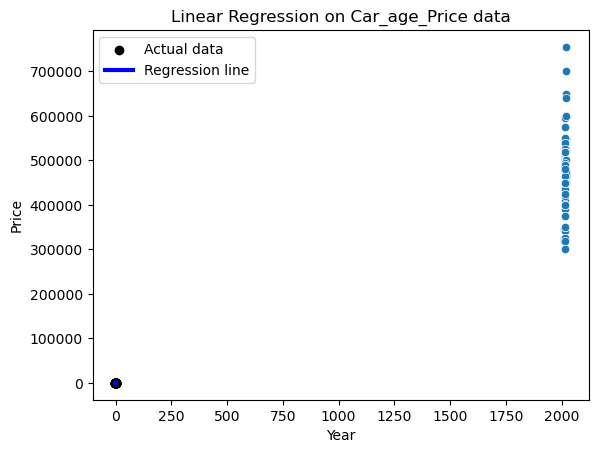

In [21]:

import matplotlib.pyplot as plt

%matplotlib inline

##understand the relationship b/w Year and Price
sns.scatterplot(x='Year', y='Price',data=car_data)
plt.scatter(x_test,y_test,color='black',label='Actual data')
plt.plot(x_test,lm_pred,color='blue',linewidth=3,label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Linear Regression on Car_age_Price data')
plt.legend()
plt.show()

# Build the linear regression model

In [6]:
##Linear Regression
x=car_data['Year']
y=car_data['Price']
print(x.shape,y.shape)

(112,) (112,)


In [7]:
##converting x and y into Numpy Arrays
import numpy as np
x=np.array(x)
y=np.array(y)

In [8]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)
y.shape

(112, 1)

In [9]:
##Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(78, 1) (34, 1) (78, 1) (34, 1)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [12]:
accuracy_lr=lr_model.score(x_test,y_test)
print(accuracy_lr)

0.4887760028600361


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#fit the model
lm = model.fit(x_train,y_train)

#prediction
lm_pred = lm.predict(x_test)

In [16]:
# Predicting price of 2022 model second-hand grand i10 using Linear Regression Model

#setting the input as 2022
input_year = (np.array(2022)).reshape(1,-1)

input_year_scaled = scaler.transform(input_year)


#predicted price of 2022 model
lm_pred_2022_price = lm.predict(input_year_scaled)

lm_price = scaler.inverse_transform(lm_pred_2022_price)

print('Predicted price of 2022 model second-hand grand i10 using Linear Model:',lm_price[0])

Predicted price of 2022 model second-hand grand i10 using Linear Model: [89247.52382957]


# Building the Lasso Regression model

In [22]:
from sklearn.linear_model import Lasso

model2 = Lasso(alpha=0.1)

#fit the model
lasso = model2.fit(x_train,y_train)

#prediction
lasso_pred = lasso.predict(x_test)

# Plotting the linear relationship between Year and Price

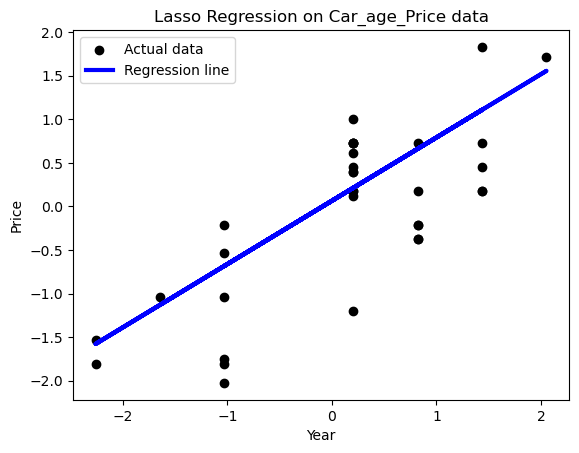

In [24]:
plt.scatter(x_test,y_test,color='black',label='Actual data')
plt.plot(x_test,lasso_pred,color='blue',linewidth=3,label='Regression line')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Lasso Regression on Car_age_Price data')
plt.legend()
plt.show()

# Model Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error,accuracy_score

lm_err = mean_absolute_error(y_test,lm_pred)
print('MAE by Linear Model :',lm_err)

lasso_err = mean_absolute_error(y_test,lasso_pred)
print('MAE by Lasso Model :',lasso_err)

MAE by Linear Model : 0.5612488215792278
MAE by Lasso Model : 0.542578344680065


In [27]:
lm_accuracy = lm.score(x_test,y_test)
print('Accuracy of Linear Model :',lm_accuracy)

lasso_accuracy = lasso.score(x_test,y_test)
print('Accuracy of Lasso Model :',lasso_accuracy)

Accuracy of Linear Model : 0.4887760028600361
Accuracy of Lasso Model : 0.519787421614369


# Conclusion
When compared to the Linear Regression Model the Lasso Regression Model has a better performance.: